In [1]:
import re
import pandas as pd
import numpy as np
import joblib

In [2]:
dataset_path = 'result/manual.csv'
df = pd.read_csv(dataset_path)

df.head()

,mati,luka,rumah,orang,klasifikasi
0,0,0,0,0,rendah
1,0,0,5,0,sedang
2,1,7729,1,318,sedang
3,0,1,0,1,rendah
4,0,0,25,230,tinggi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mati         2036 non-null   int64 
 1   luka         2036 non-null   int64 
 2   rumah        2036 non-null   int64 
 3   orang        2036 non-null   int64 
 4   klasifikasi  2036 non-null   object
dtypes: int64(4), object(1)
memory usage: 79.7+ KB


In [4]:
df_rest = df
df_rest.head()

,mati,luka,rumah,orang,klasifikasi
0,0,0,0,0,rendah
1,0,0,5,0,sedang
2,1,7729,1,318,sedang
3,0,1,0,1,rendah
4,0,0,25,230,tinggi


In [5]:
df_rest['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in df_rest['mati']]
df['mati'] = df['mati'].astype(int)

df_rest['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in df_rest['luka']]
df['luka'] = df['luka'].astype(int)

df_rest['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in df_rest['rumah']]
df['rumah'] = df['rumah'].astype(int)

df_rest['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in df_rest['orang']]
df['orang'] = df['orang'].astype(int)
# df_rest = df_rest.replace({',': '.'}, regex=True)

df_rest.head()

,mati,luka,rumah,orang,klasifikasi
0,0,0,0,0,rendah
1,0,0,5,0,sedang
2,1,7729,1,318,sedang
3,0,1,0,1,rendah
4,0,0,25,230,tinggi


In [6]:
def matiScale(matiCount: int) -> int:
  if matiCount < 3:
    return 1
  elif matiCount >= 3 and matiCount < 15:
    return 2
  return 3

def lukaScale(lukaCount: int) -> int:
  if lukaCount < 10:
    return 1
  elif lukaCount >= 10 and lukaCount < 20:
    return 2
  return 3

def rumahScale(rumahCount: int) -> int:
  if rumahCount < 4:
    return 1
  elif rumahCount >= 4 and rumahCount <= 20:
    return 2
  return 3

def orangScale(orangCount: int) -> int:
  if orangCount < 10:
    return 1
  elif orangCount >= 10 and orangCount <= 100:
    return 2
  return 3

def calculate(mati: int, luka: int, rumah: int, orang: int):
  subtractor = 0
  total = 0
  fiturCount = 4

  if (mati > 0):
    total += matiScale(matiCount=mati)
  else:
    subtractor += 1

  if (luka > 0):
    total += lukaScale(lukaCount=luka)
  else:
    subtractor += 1

  if (rumah > 0):
    total += rumahScale(rumahCount=rumah)
  else:
    subtractor += 1
  
  if (orang > 0):
    total += orangScale(orangCount=orang)
  else:
    subtractor += 1
          

  divider = (fiturCount - subtractor)
  severityMean = 0

  if (divider > 0):
    severityMean = total / divider

  if severityMean <= 1:
    return 'rendah'
  elif severityMean > 1 and severityMean <= 2:
    return 'sedang'
  else:
    return 'parah'

In [7]:
keparahanValues = []

for index, row in df_rest.iterrows():
  result = calculate(orang=int(row['orang']), \
      luka=int(row['luka']), \
        rumah=int(row['rumah']), \
          mati=int(row['mati']))
  
  keparahanValues.append(result)

In [8]:
df_rest['keparahannew'] = keparahanValues
df_rest.head()

,mati,luka,rumah,orang,klasifikasi,keparahannew
0,0,0,0,0,rendah,rendah
1,0,0,5,0,sedang,sedang
2,1,7729,1,318,sedang,sedang
3,0,1,0,1,rendah,rendah
4,0,0,25,230,tinggi,parah


In [9]:
df_rest.to_csv('result/hasilkeparahannew.csv', index=False)


In [10]:
# Dataset load
dataset_path = 'result/hasilkeparahannew.csv'
df = pd.read_csv(dataset_path)

df.head()

,mati,luka,rumah,orang,klasifikasi,keparahannew
0,0,0,0,0,rendah,rendah
1,0,0,5,0,sedang,sedang
2,1,7729,1,318,sedang,sedang
3,0,1,0,1,rendah,rendah
4,0,0,25,230,tinggi,parah


In [11]:
df_rest = df.drop(['klasifikasi'], axis=1)
df_rest.head()

,mati,luka,rumah,orang,keparahannew
0,0,0,0,0,rendah
1,0,0,5,0,sedang
2,1,7729,1,318,sedang
3,0,1,0,1,rendah
4,0,0,25,230,parah


In [12]:
# Declare feature vector and target variable
X = df_rest.drop(['keparahannew'], axis=1)
y = df_rest['keparahannew']

In [13]:
X.describe()


,mati,luka,rumah,orang
count,2036.000000,2036.000000,2036.000000,2.036000e+03
mean,120.535363,40.018664,1373.566798,3.612467e+04
std,5097.418624,533.358306,29243.615482,1.105964e+06
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,1.000000,1.000000e+00
max,230000.000000,8724.000000,1000000.000000,4.400000e+07


In [14]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
len(X_train)


1628

In [16]:
len(X_test)


408

In [17]:
X_train


,mati,luka,rumah,orang
1996,0,0,1,3
322,0,0,3046,8687
529,0,0,0,0
1380,0,0,10,1
1607,1,0,0,9
...,...,...,...,...
835,1,0,0,1
1216,0,0,0,0
1653,1,0,1,1
559,0,0,5,0


In [18]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((1628, 4), (408, 4))

In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Create model
from sklearn.naive_bayes import GaussianNB
## Instantiate the model
gnb = GaussianNB()

## Fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
joblib.dump(gnb, "model/naive_bayes.pkl")


['model/naive_bayes.pkl']

In [22]:
y_pred = gnb.predict(X_test)

y_pred

array(['rendah', 'sedang', 'rendah', 'rendah', 'parah', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'parah', 'parah', 'rendah', 'sedang',
       'rendah', 'rendah', 'parah', 'sedang', 'sedang', 'rendah',
       'rendah', 'rendah', 'sedang', 'sedang', 'rendah', 'rendah',
       'sedang', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'parah', 'parah',
       'sedang', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'sedang', 'sedang', 'rendah', 'rendah', 'rendah',
       'rendah', 'sedang', 'sedang', 'rendah', 'rendah', 'sedang',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'sedang', 'sedang', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', '

In [23]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8554


In [24]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['rendah', 'sedang', 'rendah', ..., 'rendah', 'rendah', 'rendah'],
      dtype='<U6')

In [25]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8771
Test set score: 0.8554


In [26]:
# Check class distribution in test set
print("y_test: Class")
y_test.value_counts()

y_test: Class


rendah    311
sedang     61
parah      36
Name: keparahannew, dtype: int64

In [27]:
print("y_train: Class")
y_train.value_counts()

y_train: Class


rendah    1276
sedang     241
parah      111
Name: keparahannew, dtype: int64

In [28]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [29]:
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                    #  index = ['rendah','sedang'], 
                    #  columns = ['rendah','sedang'])
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])

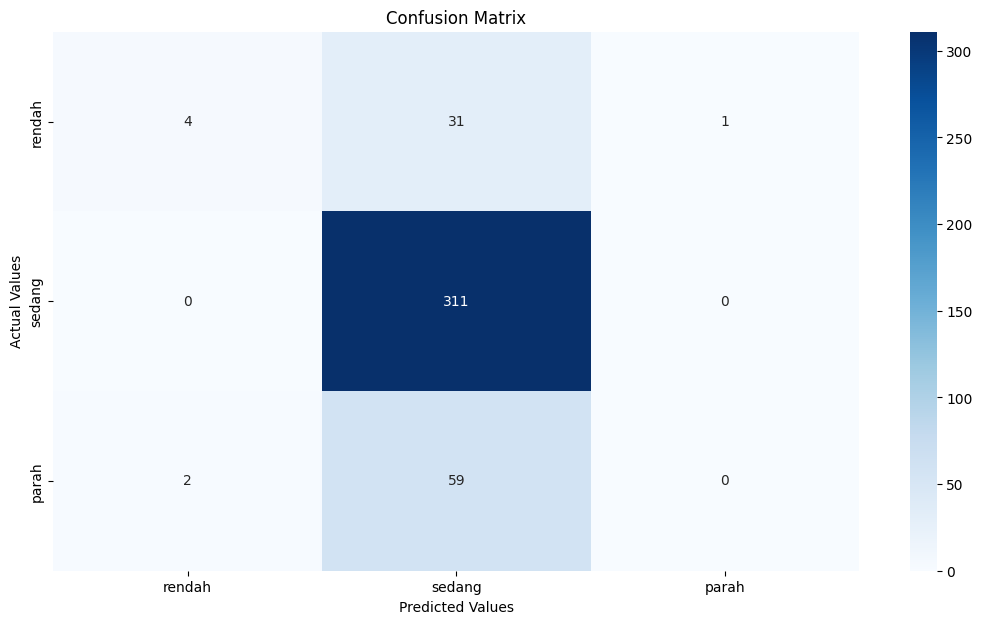

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                    #  index = ['rendah','sedang'], 
                    #  columns = ['rendah','sedang'])
                    index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [31]:
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang']))
print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang', 'parah']))

              precision    recall  f1-score   support

      rendah       0.67      0.11      0.19        36
      sedang       0.78      1.00      0.87       311
       parah       0.00      0.00      0.00        61

    accuracy                           0.77       408
   macro avg       0.48      0.37      0.35       408
weighted avg       0.65      0.77      0.68       408



In [32]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.87730061 0.85889571 0.88343558 0.87116564 0.87116564 0.88343558
 0.86503067 0.90184049 0.88271605 0.85185185]


In [33]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8747


C:\Users\RayRoyy\AppData\Local\Temp\ipykernel_9208\89793720.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


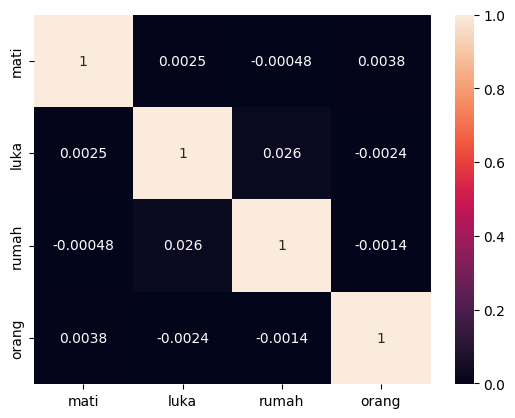

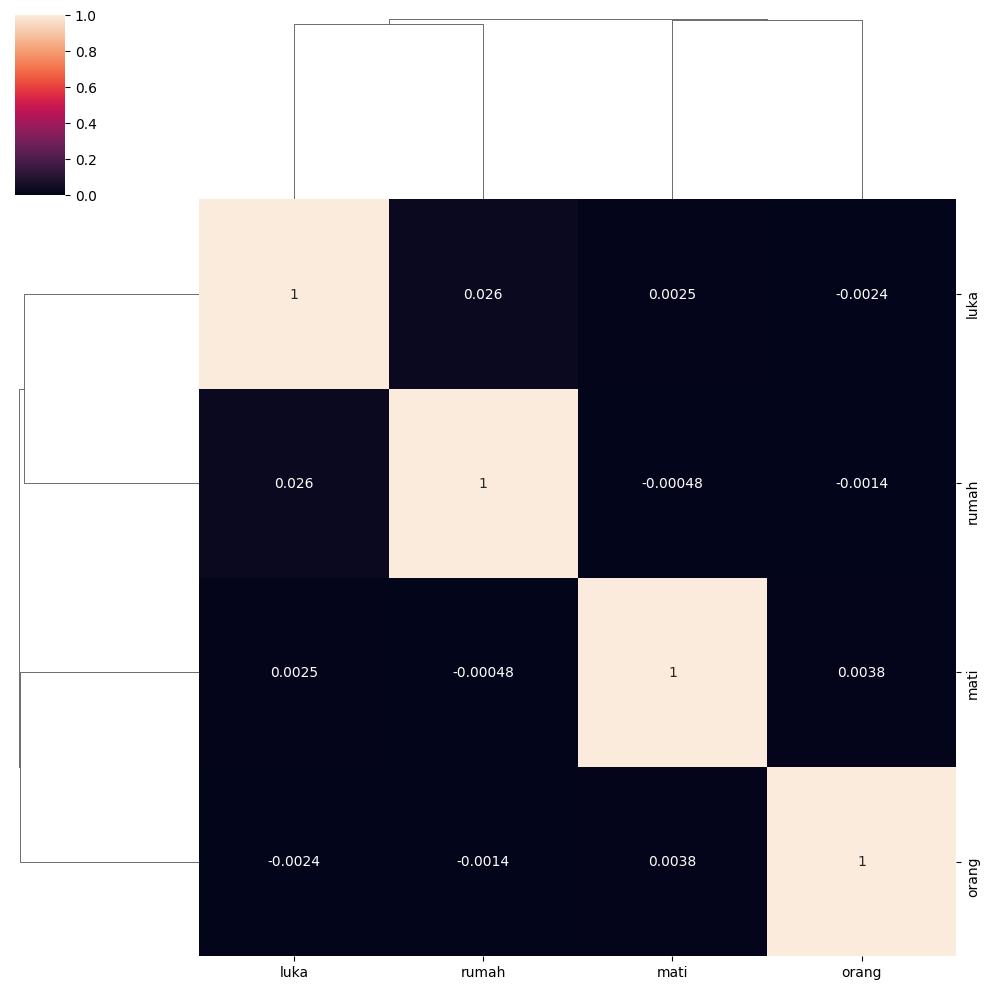

In [34]:
# Model improvements
import seaborn as sns

# calculate the correlations
correlations = df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)